In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


gym_data = pd.read_csv('Dataset/Gym_membership.csv')
X = gym_data[["Age", "Gender", "Weight (kg)", "Height (m)", "BMI", 
          "Calories_Burned", "Workout_Frequency (days/week)", "Water_Intake (liters)"]]
y = gym_data["Fat_Percentage"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
numerical_features = ["Age", "Weight (kg)", "Height (m)", "BMI", 
                      "Calories_Burned", "Workout_Frequency (days/week)", "Water_Intake (liters)"]
categorical_features = ["Gender"]
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [11]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Weight (kg)',
                                                   'Height (m)', 'BMI',
                                                   'Calories_Burned',
                                                   'Workout_Frequency '
                                                   '(days/week)',
                                                   'Water_Intake (liters)']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender'])])),
                ('model', RandomForestRegressor())])

In [13]:
score = pipeline.score(X_test, y_test)
print(f"Model R^2 Score: {score}")

Model R^2 Score: 0.7870400904743021


In [14]:
# Example input for prediction
# Replace these values with the new data you want to predict
new_data = pd.DataFrame({
    "Age": [19],                       # Example Age
    "Gender": ["Male"],                # Example Gender
    "Weight (kg)": [89],               # Example Weight
    "Height (m)": [1.77],              # Example Height
    "BMI": [28.41],                     # Example BMI
    "Calories_Burned": [1048],         # Example Calories Burned
    "Workout_Frequency (days/week)": [4],  # Example Workout Frequency
    "Water_Intake (liters)": [3.7]     # Example Water Intake
})

# Predict Fat_Percentage using the trained pipeline
predicted_fat_percentage = pipeline.predict(new_data)

# Print the prediction
print(f"Predicted Fat Percentage: {predicted_fat_percentage[0]:.2f}")

Predicted Fat Percentage: 24.52


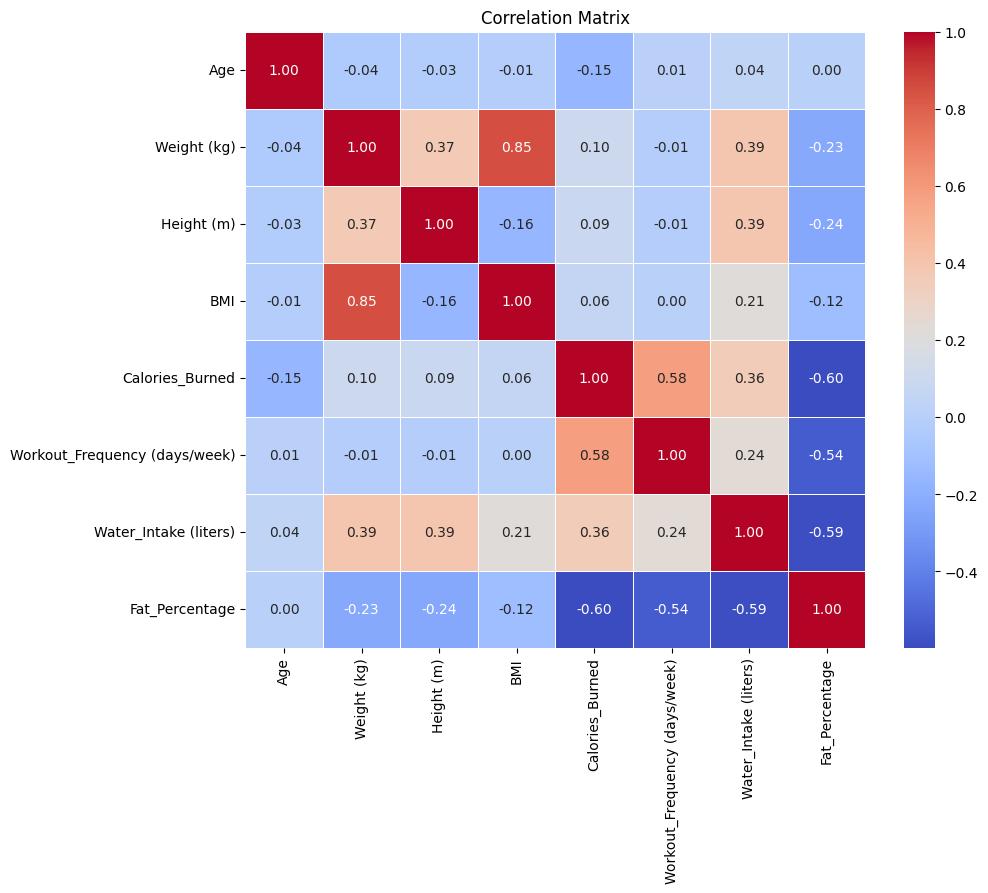

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Dataset/Gym_membership.csv')  # Replace with your dataset path

numerical_features = [
    "Age", "Weight (kg)", "Height (m)", "BMI", "Calories_Burned",
    "Workout_Frequency (days/week)", "Water_Intake (liters)", "Fat_Percentage"
]

correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [19]:
# Predictions on the test set
y_pred = pipeline.predict(X_test)

# R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Adjusted R²
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features (columns)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f"Adjusted R²: {adj_r2:.4f}")

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {explained_variance:.4f}")

# Cross-validation (for Random Forest)
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring="neg_mean_squared_error")
cv_rmse = np.sqrt(-cv_scores)  # Negative MSE is returned, so negate it and calculate RMSE
print(f"Cross-Validation RMSE: {cv_rmse.mean():.4f} ± {cv_rmse.std():.4f}")


R² Score: 0.7870
Mean Absolute Error (MAE): 2.4677
Mean Squared Error (MSE): 8.4403
Root Mean Squared Error (RMSE): 2.9052
Adjusted R²: 0.7779
Explained Variance Score: 0.7870
Cross-Validation RMSE: 3.0347 ± 0.0779
